In [32]:
# load library 
import cv2 as cv
import matplotlib.pyplot as plt

In [33]:
#1 = config_file
# 2= frozen model
config_file = "C://Users//Priya//Downloads//ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "C://Users//Priya//Downloads//frozen_inference_graph.pb"

In [37]:
# now load the model 
model=cv.dnn_DetectionModel(frozen_model,config_file)

In [35]:
classLables =[]# empty list of python
file_name="C://Users//Priya//Downloads//labels.txt"
with open(file_name, 'rt') as fpt:
    classLables=fpt.read().rstrip('\n').split('\n')

In [36]:
#  to detect as the are defined already
print(len(classLables))# 80 number of class in this given text file

80


In [38]:
print(classLables)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'horse', 'cat', 'dog', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [39]:
# define the config of for these object detection, its already predefine for mobile net 
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000012697594710>

In [40]:
img= cv.imread("C://Users//Priya//OneDrive//Pictures//Screenshots//c4.png")

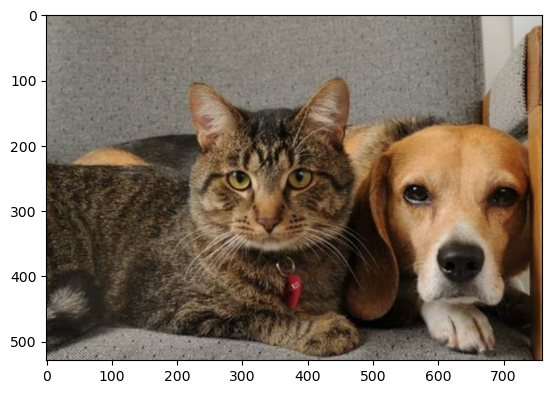

In [41]:
# change the color to original color
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [42]:

ClassIndex, confidece, bbox=model.detect(img, confThreshold=0.5)

In [43]:
 
print(ClassIndex)

[17 18]


In [44]:
# define the bounding box and format 
font_scale = 3
font = cv.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y),(x+w , y+h),(255,0,0),2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness=1)
    cv.rectangle(img, boxes,(215, 0, 0), 2)
    cv.putText(img, classLables[ClassInd-1] , (boxes[0]+10,boxes[1]+40) , font, fontScale = font_scale, color = (0,255,0), thickness=3)

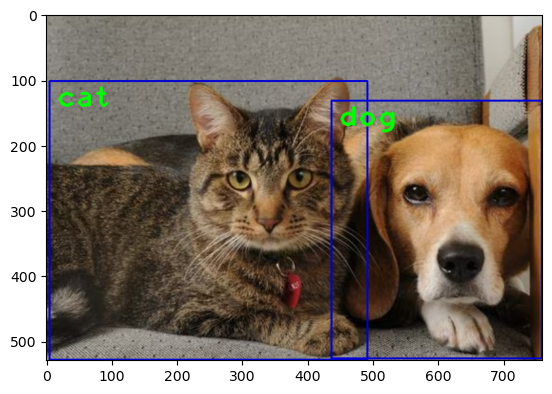

In [45]:
# lets show now 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))